<a href="https://colab.research.google.com/github/Arthur-Barreto/Exoplanets/blob/main/RedeNeural/random__forest%26tree_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook have the propouse of using random tree model to
## The goal is evaluate the model fit with kepler dataset

In [ ]:
# necessaries imports

import numpy as np
import pandas as pd

## import the database

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## reading the final dataset, which was built on svm model

In [ ]:
df_final = pd.read_pickle("/content/gdrive/MyDrive/logArthur/df_final.pkl")
df_final.tail()

,sky_position,max_power,period_at_max_power,transit_time_at_max_power,duration_at_max_power,has_flux,lc_flux
980,Kepler-995,65057.308271,18.3981398139814 d,140.928033,0.33 d,1,"[0.9999604452048021, 1.0000610666857797, 0.999..."
981,Kepler-996,48.911612,22.62796279627963 d,144.567433,0.25 d,0,"[1.0000429087866467, 0.999736766387529, 0.9998..."
982,Kepler-997,3093.543031,283.1611161116112 d,284.028951,0.33 d,1,"[0.9998879432678223, 0.9998437166213989, 0.999..."
983,Kepler-998,253.822173,16.96159615961596 d,143.011726,0.1 d,0,"[1.0000904203054084, 1.0000009536748848, 1.000..."
984,Kepler-999,1077.210705,328.45214521452147 d,245.593376,0.33 d,1,"[0.9999930262565613, 1.0000970363616943, 0.999..."


## Verifing the part of data who has the most data closer

In [ ]:
info = []
for data in df_final['lc_flux']:
    info.append(len(data))

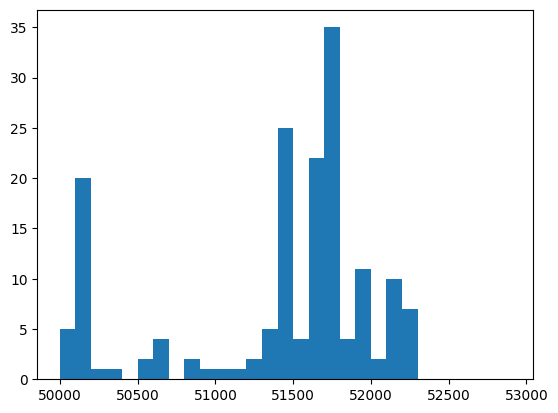

In [ ]:
import matplotlib.pyplot as plt

faixa = np.arange(50e3,53e3,100)
plt.hist(info, bins=faixa);

## filtering the data that has at least 64k data, and who has more than 64k, just take the 64k first

In [ ]:
conditional_array = [((len(data) > 64000) & (len(data) < 65000)) for data in df_final['lc_flux']]

conditional_array.count(1)

548

In [ ]:
df_filtered = df_final[conditional_array]

df_filtered.describe()

,max_power,transit_time_at_max_power,has_flux
count,5.480000e+02,548.000000,548.000000
mean,4.392938e+04,185.054270,0.452555
std,2.674665e+05,78.707839,0.498199
min,2.973308e+01,120.754127,0.000000
25%,2.735718e+02,138.170839,0.000000
50%,7.635670e+02,148.887245,0.000000
75%,3.508068e+03,189.943774,1.000000
max,4.499717e+06,509.292285,1.000000


In [ ]:
df_filtered['lc_flux_2'] = df_filtered['lc_flux']
df_filtered['lc_flux_2'] = [lista[:64000] for lista in df_filtered['lc_flux']]
df_filtered['lc_flux_2'] = [np.array(lista) for lista in df_filtered['lc_flux_2']]

<ipython-input-8-5a8801457114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['lc_flux_2'] = df_filtered['lc_flux']
<ipython-input-8-5a8801457114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['lc_flux_2'] = [lista[:64000] for lista in df_filtered['lc_flux']]
<ipython-input-8-5a8801457114>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
df_filtered.to_pickle("/content/gdrive/MyDrive/logArthur/df_filtered.pkl")

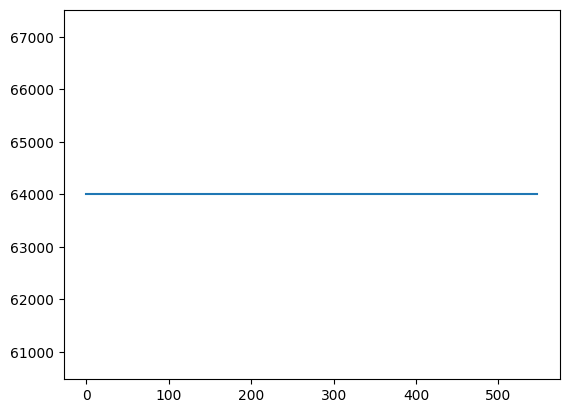

In [ ]:
info = []
for data in df_filtered['lc_flux_2']:
    info.append(len(data))

plt.plot(np.arange(0,len(info)),info)

## Once this model doesn't require equal sizes to train, it's not necessary to filter the data before train the model

<li> In order to train, it was used the folowing tutorial: <a> <href = "https://www.datacamp.com/tutorial/random-forests-classifier-python"> Random Forest </a>

In [ ]:
zeros = df_filtered[df_filtered['has_flux'] == 0]
ones = df_filtered[df_filtered['has_flux'] == 1]

num_zeros = len(zeros)
num_ones = len(ones)

print(num_zeros, num_ones)

300 248


In [ ]:
selected_zeros = zeros.sample(n=248)
selected_ones = ones.sample(n=248)

selected_data = pd.concat([selected_zeros, selected_ones])
selected_data = selected_data.reset_index()

selected_data.describe()

,index,max_power,transit_time_at_max_power,has_flux
count,496.000000,4.960000e+02,496.000000,496.000000
mean,507.788306,4.850007e+04,185.440774,0.500000
std,286.013303,2.807718e+05,78.072656,0.500505
min,8.000000,2.973308e+01,120.754127,0.000000
25%,251.500000,3.123118e+02,138.170839,0.000000
50%,518.500000,1.002148e+03,148.707699,0.500000
75%,755.500000,4.222253e+03,193.685030,1.000000
max,983.000000,4.499717e+06,498.527620,1.000000


## Now it's just train

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(list(selected_data.lc_flux_2), selected_data.has_flux, test_size=0.5, random_state=42)

In [ ]:
print(f"{len(X_train)}, {len(y_train)}")

248, 248


In [ ]:
# fitting 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6733870967741935


## testingwith the data used to train

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.532258064516129


# Using tree regresor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tr = DecisionTreeRegressor()
tr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = tr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5806451612903226


## testing with the data used to train the dataset

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.532258064516129
